In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None
churn_data=pd.read_csv('/content/drive/MyDrive/datsets/data_telco_customer_churn.csv')
churn_data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
churn_data.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [5]:
for cols in churn_data.select_dtypes(include='object').columns:
   print(cols)
   print(churn_data[cols].value_counts())

Dependents
No     3446
Yes    1484
Name: Dependents, dtype: int64
OnlineSecurity
No                     2445
Yes                    1433
No internet service    1052
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     2172
Yes                    1706
No internet service    1052
Name: OnlineBackup, dtype: int64
InternetService
Fiber optic    2172
DSL            1706
No             1052
Name: InternetService, dtype: int64
DeviceProtection
No                     2186
Yes                    1692
No internet service    1052
Name: DeviceProtection, dtype: int64
TechSupport
No                     2467
Yes                    1411
No internet service    1052
Name: TechSupport, dtype: int64
Contract
Month-to-month    2721
Two year          1157
One year          1052
Name: Contract, dtype: int64
PaperlessBilling
Yes    2957
No     1973
Name: PaperlessBilling, dtype: int64
Churn
No     3614
Yes    1316
Name: Churn, dtype: int64


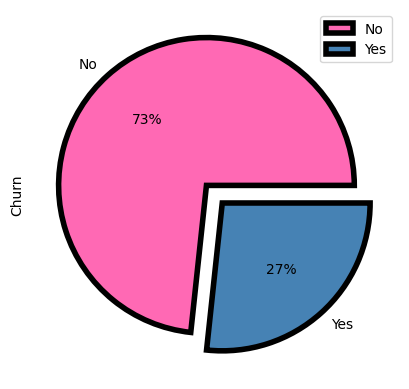

In [8]:
colors = ['hotpink','steelblue','pink', 'lime','silver','deepskyblue']
explode = (0.08, 0.08)
churn_data['Churn'].value_counts().plot(kind='pie',y='churn_prediction', autopct='%1.0f%%',  colors=colors, explode=explode,wedgeprops = {"edgecolor" : "black",'linewidth': 4,'antialiased': True})
plt.legend()

<Axes: xlabel='PaperlessBilling', ylabel='count'>

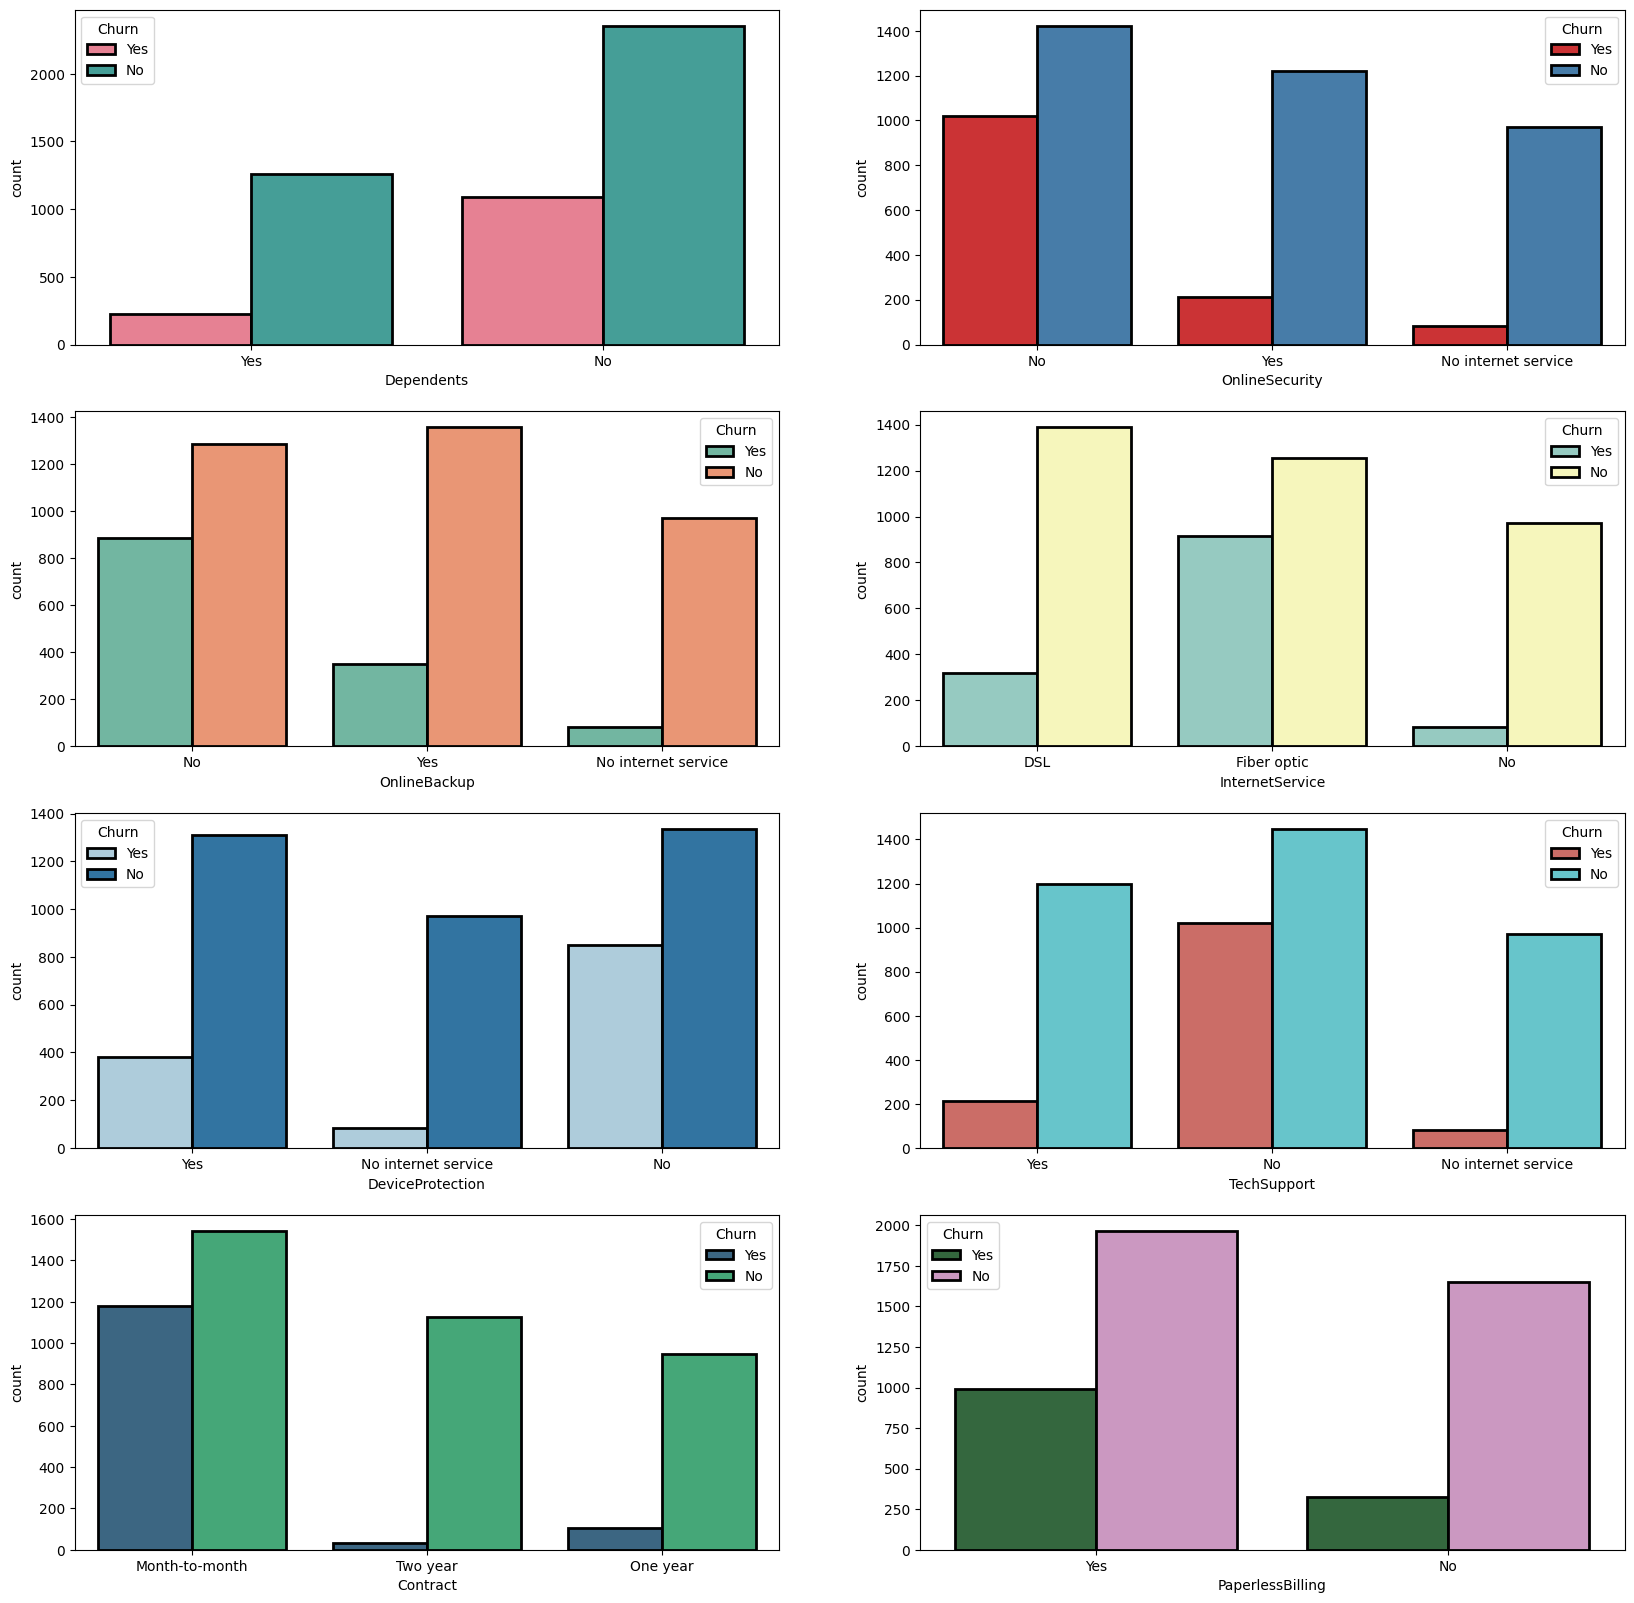

In [25]:
import seaborn as sns

fig, axarr = plt.subplots(4, 2, figsize=(20, 20))

sns.countplot(x='Dependents',data=churn_data,hue='Churn',palette = "husl",edgecolor='black',linewidth=2,ax=axarr[0][0])
sns.countplot(x='OnlineSecurity',data=churn_data,hue='Churn',palette = "Set1",edgecolor='black',linewidth=2,ax=axarr[0][1])
sns.countplot(x='OnlineBackup',data=churn_data,hue='Churn',palette = "Set2",edgecolor='black',linewidth=2,ax=axarr[1][0])
sns.countplot(x='InternetService',data=churn_data,hue='Churn',palette = "Set3",edgecolor='black',linewidth=2,ax=axarr[1][1])
sns.countplot(x='DeviceProtection',data=churn_data,hue='Churn',palette = "Paired",edgecolor='black',linewidth=2,ax=axarr[2][0])
sns.countplot(x='TechSupport',data=churn_data,hue='Churn',palette = "hls",edgecolor='black',linewidth=2,ax=axarr[2][1])
sns.countplot(x='Contract',data=churn_data,hue='Churn',palette = "viridis",edgecolor='black',linewidth=2,ax=axarr[3][0])
sns.countplot(x='PaperlessBilling',data=churn_data,hue='Churn',palette = "cubehelix",edgecolor='black',linewidth=2,ax=axarr[3][1])

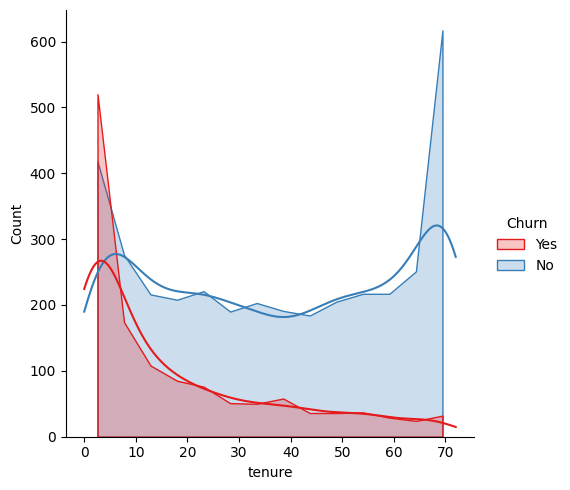

In [33]:
sns.displot(data=churn_data, x="tenure", hue="Churn",kde=True,element="poly",palette = "Set1")

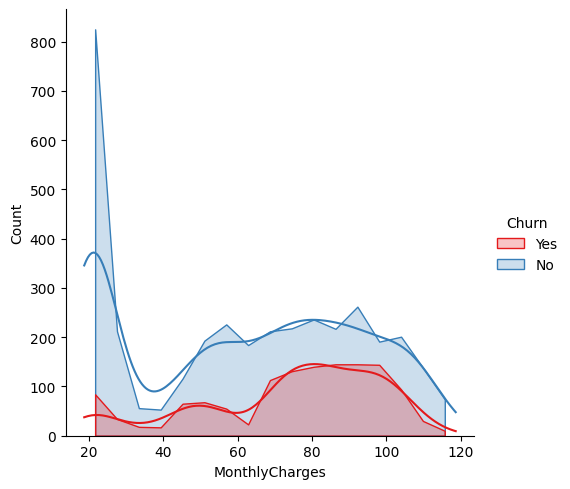

In [34]:
sns.displot(data=churn_data, x="MonthlyCharges", hue="Churn",kde=True,element="poly",palette = "Set1")

<Axes: xlabel='MonthlyCharges'>

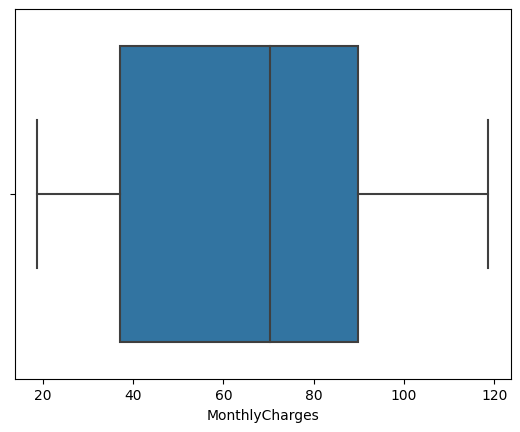

In [38]:
sns.boxplot(data=churn_data, x="MonthlyCharges")

<Axes: xlabel='tenure'>

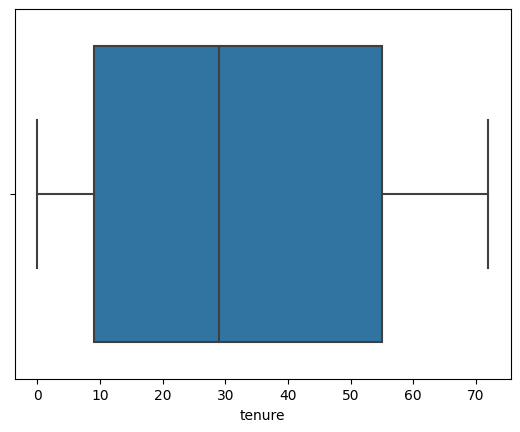

In [39]:
sns.boxplot(data=churn_data, x="tenure")

In [35]:
feature_data=churn_data.copy()
feature_data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [40]:
for cols in churn_data.select_dtypes(include='object').columns:
  feature_data[cols]=feature_data[cols].astype("category").cat.codes

feature_data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,1,9,0,0,0,2,2,0,1,72.90,1
1,0,14,0,2,1,2,0,0,1,82.65,0
2,0,64,2,0,0,2,2,2,0,47.85,1
3,0,72,2,2,0,2,2,2,0,69.65,0
4,0,3,1,1,2,1,1,0,1,23.60,0


In [42]:
corr=feature_data.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
Dependents,1.000000,0.154827,0.154586,0.084881,0.017940,0.076124,0.135063,0.243351,-0.109301,-0.111378,-0.171076
tenure,0.154827,1.000000,0.319956,0.370857,-0.040522,0.364443,0.324569,0.671364,0.005435,0.240244,-0.362734
OnlineSecurity,0.154586,0.319956,1.000000,0.181366,-0.035849,0.171425,0.277854,0.367844,-0.167463,-0.056241,-0.286902
OnlineBackup,0.084881,0.370857,0.181366,1.000000,0.028805,0.201321,0.197816,0.280817,-0.017133,0.115627,-0.214023
InternetService,0.017940,-0.040522,-0.035849,0.028805,1.000000,0.043299,-0.025642,0.085016,-0.136523,-0.318025,-0.038263
DeviceProtection,0.076124,0.364443,0.171425,0.201321,0.043299,1.000000,0.245563,0.350805,-0.045900,0.161958,-0.174903
TechSupport,0.135063,0.324569,0.277854,0.197816,-0.025642,0.245563,1.000000,0.421143,-0.121517,-0.014944,-0.279237
Contract,0.243351,0.671364,0.367844,0.280817,0.085016,0.350805,0.421143,1.000000,-0.175413,-0.077697,-0.403330
PaperlessBilling,-0.109301,0.005435,-0.167463,-0.017133,-0.136523,-0.045900,-0.121517,-0.175413,1.000000,0.351816,0.188743
MonthlyCharges,-0.111378,0.240244,-0.056241,0.115627,-0.318025,0.161958,-0.014944,-0.077697,0.351816,1.000000,0.193099


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

x=feature_data.copy()
x.drop(columns=['Churn'],inplace=True)
x.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,1,9,0,0,0,2,2,0,1,72.90
1,0,14,0,2,1,2,0,0,1,82.65
2,0,64,2,0,0,2,2,2,0,47.85
3,0,72,2,2,0,2,2,2,0,69.65
4,0,3,1,1,2,1,1,0,1,23.60


In [48]:
y=feature_data[['Churn']]
y.head()

,Churn
0,1
1,0
2,1
3,0
4,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Logistic_reg_model=LogisticRegression(solver='lbfgs',max_iter=10000)
Logistic_reg_model.fit(X_train, y_train.values.ravel())
log_y_pred = Logistic_reg_model.predict(X_test)
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))

Achieved accuracy: 0.792
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1061
           1       0.68      0.51      0.58       418

    accuracy                           0.79      1479
   macro avg       0.75      0.71      0.72      1479
weighted avg       0.78      0.79      0.78      1479



In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)

X_sample,y_sample=sm.fit_resample(x, y)

X_resample_train, X_resample_test, y_resample_train, y_resample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [54]:
Log_sample_reg_model=LogisticRegression(solver='lbfgs',max_iter=10000)
Log_sample_reg_model.fit(X_resample_train, y_resample_train.values.ravel())
log_sample_y_pred = Log_sample_reg_model.predict(X_resample_test)
print("Achieved accuracy: %0.3f" %
      accuracy_score(y_resample_test, log_sample_y_pred))
print(classification_report(y_resample_test, log_sample_y_pred))

Achieved accuracy: 0.801
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       706
           1       0.79      0.83      0.81       740

    accuracy                           0.80      1446
   macro avg       0.80      0.80      0.80      1446
weighted avg       0.80      0.80      0.80      1446



In [55]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Param = {"subsample":[0.5, 0.75, 1],
              "learning_rate":[0.3, 0.1, 0.03],
               "n_estimators":[100,128,150]}

model_resample = XGBClassifier(n_jobs=-1)

model_gs_resaple = GridSearchCV(model_resample,param_grid=Param,cv=3,scoring="accuracy")

model_gs_resaple.fit(X_resample_train, y_resample_train.values.ravel())
boost_pred_resample=model_gs_resaple.predict(X_resample_test)
print(model_gs_resaple.best_estimator_)
print(model_gs_resaple.score(X_resample_test, y_resample_test))
print(classification_report(y_resample_test,boost_pred_resample))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)
0.8312586445366529
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       706
           1       0.82      0.86      0.84       740

    accuracy                           0.83      1446
   macro 